<a href="https://colab.research.google.com/github/ckraju/kvasu/blob/master/currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
import pandas as pd


In [0]:
import io

df2 = pd.read_csv(io.BytesIO(uploaded['test.csv']))

# Dataset is now stored in a Pandas Dataframe

In [0]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
from keras.utils import to_categorical

In [0]:
# fix random seed for reproducibility
seed = 23
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("test.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:23]
Y = dataset[:,23]

In [24]:
X

array([[0.9, 1. , 1. , ..., 0.9, 0.9, 1. ],
       [0.9, 1. , 1. , ..., 0.9, 0.9, 1. ],
       [0.9, 1. , 0.9, ..., 0.9, 0.9, 1. ],
       ...,
       [1. , 0.9, 0.9, ..., 1. , 1. , 0.9],
       [1. , 0.9, 0.9, ..., 1. , 1. , 0.9],
       [1. , 0.9, 1. , ..., 1. , 1. , 0.9]])

In [25]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
# create model
model = Sequential()
model.add(Dense(23, input_dim=23, kernel_initializer='uniform', activation='relu'))
model.add(Dense(480, kernel_initializer='uniform', activation='relu'))
model.add(Dense(180, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [29]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.23, epochs=150)
# list all data in history
print(history.history.keys())

Train on 45 samples, validate on 14 samples
Epoch 1/150
45/45 [==============================] - 1s 15ms/step - loss: 0.6927 - acc: 0.5778 - val_loss: 0.7013 - val_acc: 0.0000e+00
Epoch 2/150
45/45 [==============================] - 0s 403us/step - loss: 0.6918 - acc: 0.5778 - val_loss: 0.7125 - val_acc: 0.0000e+00
Epoch 3/150
45/45 [==============================] - 0s 383us/step - loss: 0.6900 - acc: 0.5778 - val_loss: 0.7296 - val_acc: 0.0000e+00
Epoch 4/150
45/45 [==============================] - 0s 348us/step - loss: 0.6877 - acc: 0.5778 - val_loss: 0.7562 - val_acc: 0.0000e+00
Epoch 5/150
45/45 [==============================] - 0s 343us/step - loss: 0.6845 - acc: 0.5778 - val_loss: 0.7897 - val_acc: 0.0000e+00
Epoch 6/150
45/45 [==============================] - 0s 376us/step - loss: 0.6828 - acc: 0.5778 - val_loss: 0.8352 - val_acc: 0.0000e+00
Epoch 7/150
45/45 [==============================] - 0s 442us/step - loss: 0.6804 - acc: 0.5778 - val_loss: 0.8735 - val_acc: 0.0000e+0

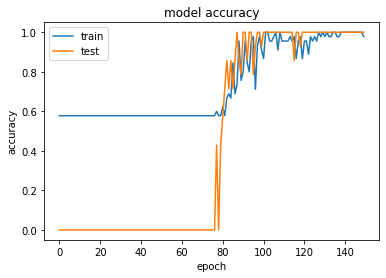

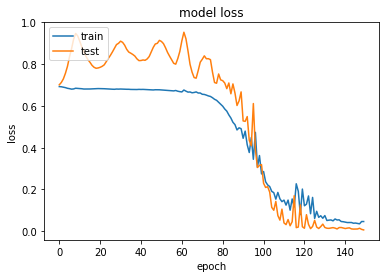

In [30]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()